In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm

# Importation des données

In [2]:
data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv")
data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


On remarque directement des " ? " dans plusieurs colonnes, on va voir ce qu'il en retourne et voir si cela va impacter l'analyse des données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

On voit que les 3 colonnes où il y avait des " ? " sont marqué en type objet, et aucune autre

In [4]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [5]:
data.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

In [6]:
data.shape

(3395, 20)

In [7]:
data.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

les " ? " ne sont pas considéré comme null on devra donc modifier ça

### on compte le nombre de " ? " dans les colonnes impactées

In [8]:
print(data.Age.value_counts()) 
print("-----")
count=0
for i in range(len(data.Age)):
  if data.Age[i] == '?':
    count+=1
print(count)

20    357
21    344
18    325
22    314
19    313
23    259
16    256
17    248
24    225
25    168
26    136
27    111
28     73
?      55
29     52
30     32
31     29
32     21
35     17
33     15
34     15
36      8
38      5
37      5
40      4
41      3
39      3
44      1
43      1
Name: Age, dtype: int64
-----
55


In [9]:
print(data.HoursPerWeek.value_counts())
print("-----")
count=0
for i in range(len(data.HoursPerWeek)):
  if data.HoursPerWeek[i] == '?':
    count+=1
print(count)

10     411
8      390
20     335
12     331
6      323
28     280
24     233
16     223
4      219
14     181
2      108
42      92
?       56
30      54
36      50
56      33
18      24
40      12
70       9
48       7
50       5
32       5
96       2
84       2
60       2
98       1
90       1
140      1
112      1
0        1
72       1
168      1
80       1
Name: HoursPerWeek, dtype: int64
-----
56


In [10]:
data.TotalHours.value_counts() # trop d'heure différente donc pas possible d'afficher a moins d'augmenter la taille 
# de la sortie, donc on va ruser

500     328
400     213
1000    210
300     202
600     187
       ... 
711       1
460       1
255       1
184       1
620       1
Name: TotalHours, Length: 238, dtype: int64

In [11]:
count=0
for i in range(len(data.TotalHours)):
  if data.TotalHours[i] == '?':
    count+=1
print(count)

57


In [12]:
data.LeagueIndex.value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

c:\users\thoma\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


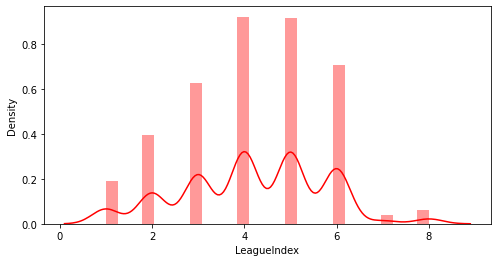

In [13]:
plt.figure(figsize=(8,4))
sns.distplot(data['LeagueIndex'],color='red')
plt.show()

[]

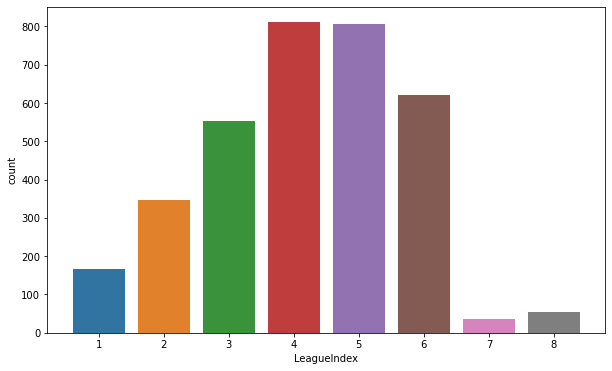

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='LeagueIndex')
plt.plot()

### on remplace les " ? " par des valeurs null pour les traités plus facilement

In [15]:
missing_values = ["?"]
dataf= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv", na_values = missing_values)
dataf

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [16]:
print(dataf.isnull().sum()) #on voit que les missing value se concentre uniquement sur l'age, le nombre d'heure par semaine et
#le total d'heure


GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [17]:
dataf.dtypes

GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

On peut voir que les données marquées précedemment comme object sont devenus float donc le problème est " réglé ". On ne l'a pas fait apparaitre mais on avait essayer un dataset en supprimant les valeur manquantes et on avait remarqué que l'index 8 de indexLeague avait disparu, donc les données manquantes se concentraient exclusivement sur l'index 8 ( et 2 dans l'index 4 ) donc si on supprime on perd l'index 8 qui n'est pas souhaité.

### Visualisation des données entre elle 

[[<AxesSubplot:xlabel='GameID', ylabel='GameID'>
  <AxesSubplot:xlabel='LeagueIndex', ylabel='GameID'>
  <AxesSubplot:xlabel='Age', ylabel='GameID'>
  <AxesSubplot:xlabel='HoursPerWeek', ylabel='GameID'>
  <AxesSubplot:xlabel='TotalHours', ylabel='GameID'>
  <AxesSubplot:xlabel='APM', ylabel='GameID'>
  <AxesSubplot:xlabel='SelectByHotkeys', ylabel='GameID'>
  <AxesSubplot:xlabel='AssignToHotkeys', ylabel='GameID'>
  <AxesSubplot:xlabel='UniqueHotkeys', ylabel='GameID'>
  <AxesSubplot:xlabel='MinimapAttacks', ylabel='GameID'>
  <AxesSubplot:xlabel='MinimapRightClicks', ylabel='GameID'>
  <AxesSubplot:xlabel='NumberOfPACs', ylabel='GameID'>
  <AxesSubplot:xlabel='GapBetweenPACs', ylabel='GameID'>
  <AxesSubplot:xlabel='ActionLatency', ylabel='GameID'>
  <AxesSubplot:xlabel='ActionsInPAC', ylabel='GameID'>
  <AxesSubplot:xlabel='TotalMapExplored', ylabel='GameID'>
  <AxesSubplot:xlabel='WorkersMade', ylabel='GameID'>
  <AxesSubplot:xlabel='UniqueUnitsMade', ylabel='GameID'>
  <AxesSubplo

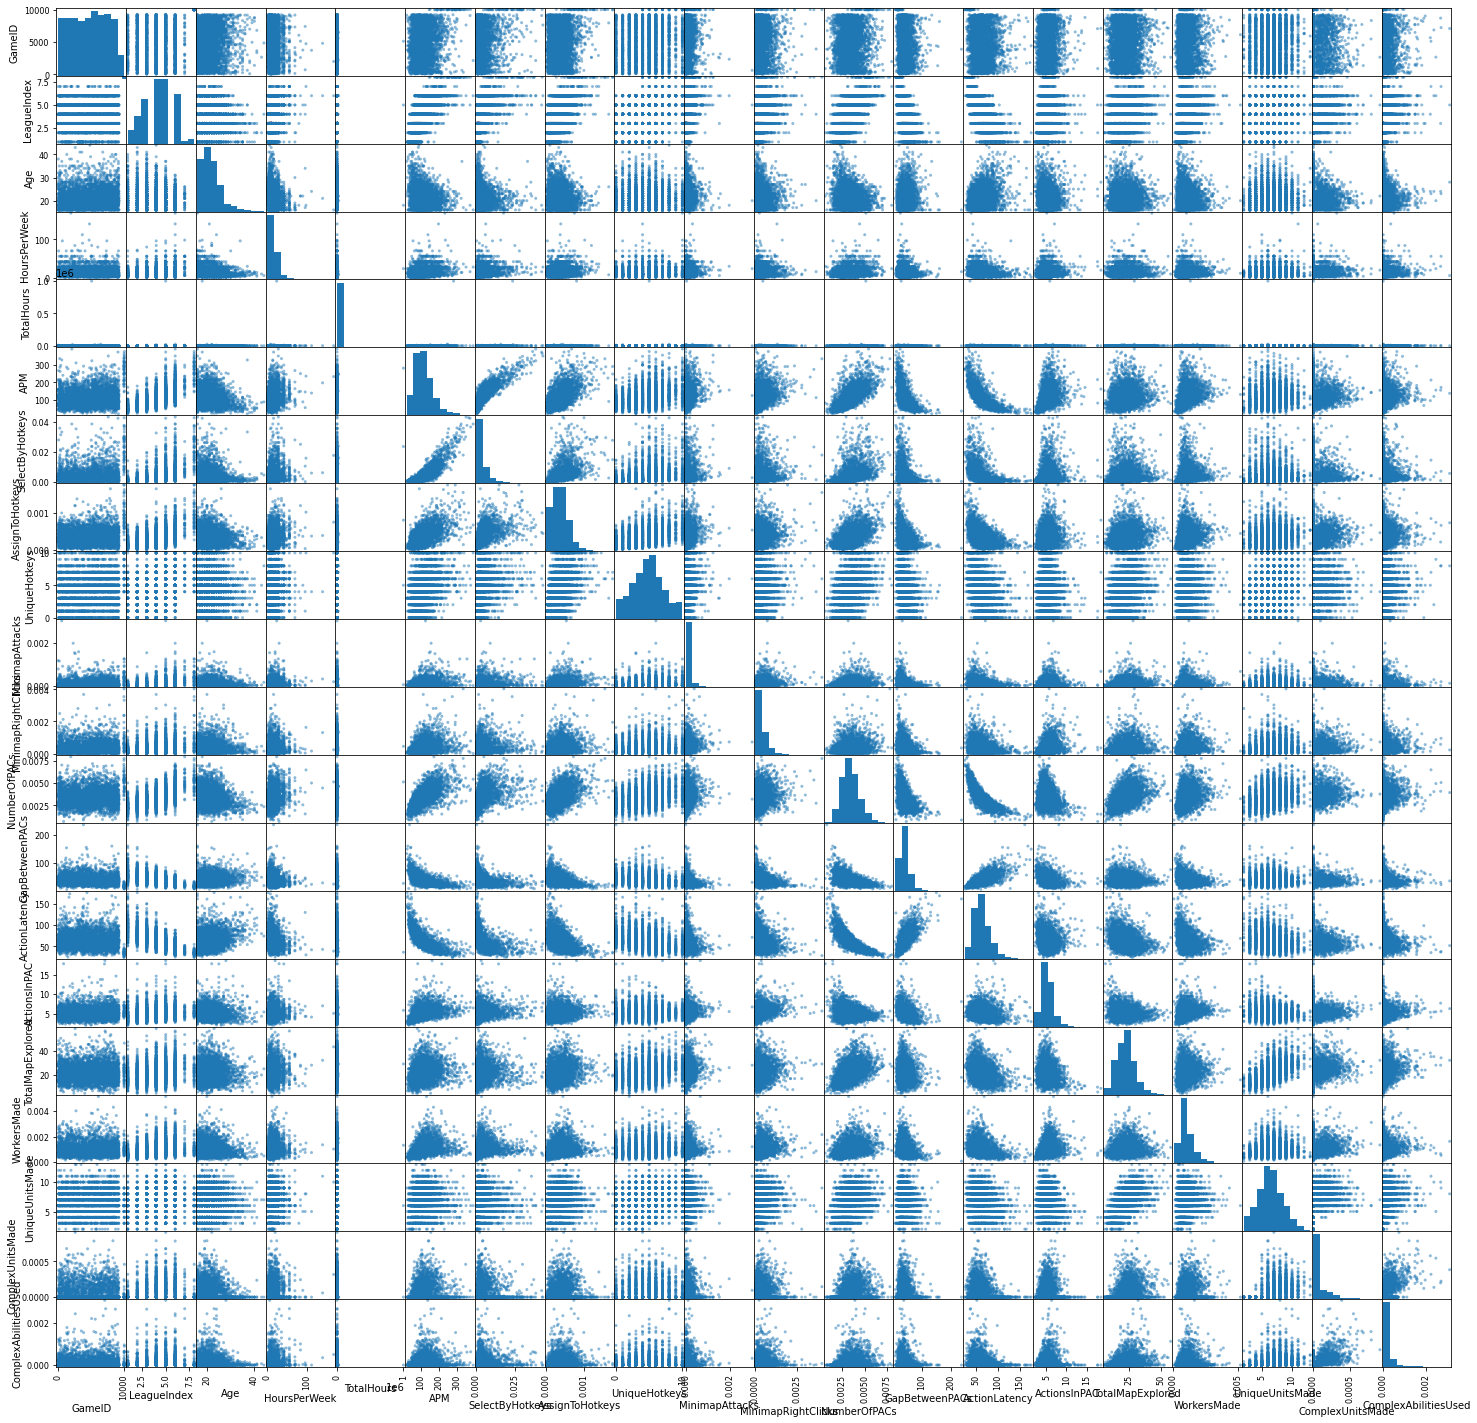

In [18]:
print(pd.plotting.scatter_matrix(dataf, figsize=(25,25)))


array([[<AxesSubplot:title={'center':'GameID'}>,
        <AxesSubplot:title={'center':'LeagueIndex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HoursPerWeek'}>],
       [<AxesSubplot:title={'center':'TotalHours'}>,
        <AxesSubplot:title={'center':'APM'}>,
        <AxesSubplot:title={'center':'SelectByHotkeys'}>,
        <AxesSubplot:title={'center':'AssignToHotkeys'}>],
       [<AxesSubplot:title={'center':'UniqueHotkeys'}>,
        <AxesSubplot:title={'center':'MinimapAttacks'}>,
        <AxesSubplot:title={'center':'MinimapRightClicks'}>,
        <AxesSubplot:title={'center':'NumberOfPACs'}>],
       [<AxesSubplot:title={'center':'GapBetweenPACs'}>,
        <AxesSubplot:title={'center':'ActionLatency'}>,
        <AxesSubplot:title={'center':'ActionsInPAC'}>,
        <AxesSubplot:title={'center':'TotalMapExplored'}>],
       [<AxesSubplot:title={'center':'WorkersMade'}>,
        <AxesSubplot:title={'center':'UniqueUnitsMade'}>,
        <

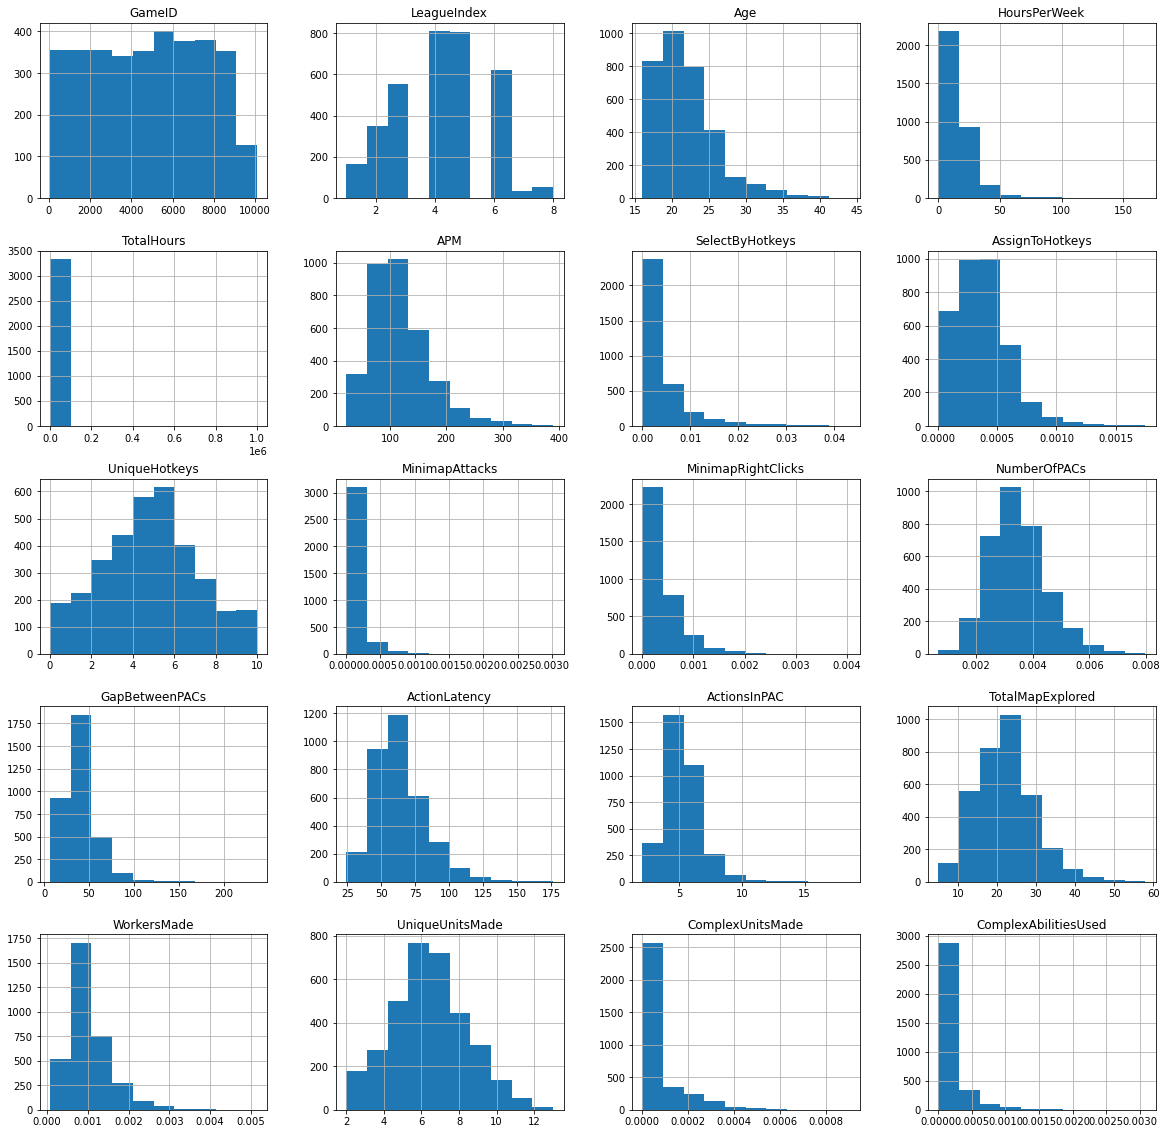

In [19]:
dataf.hist(figsize = (20,20))

<AxesSubplot:>

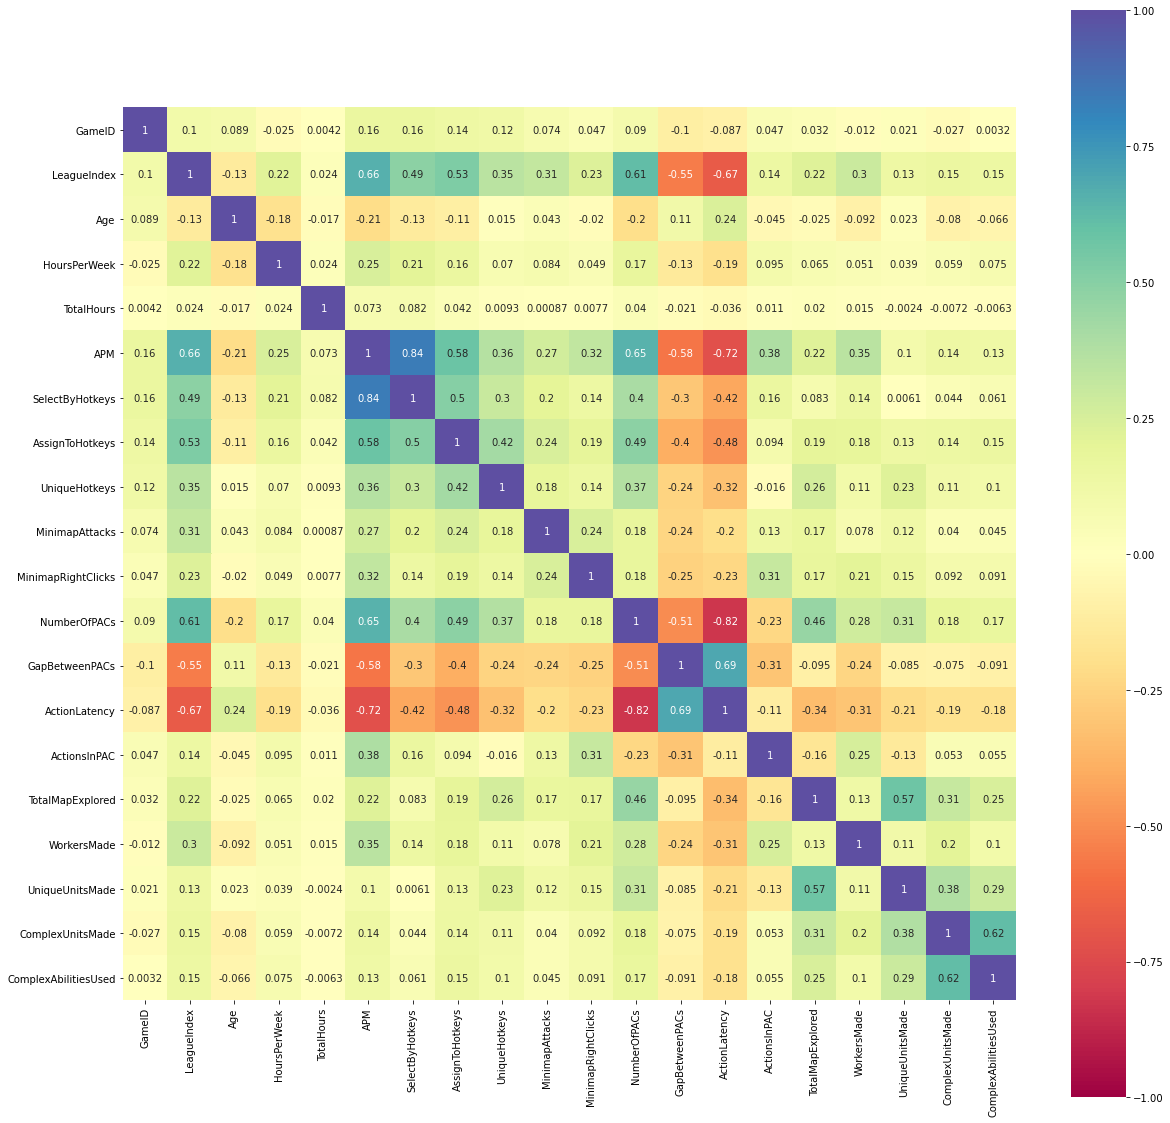

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(dataf.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='Spectral',
            annot=True, 
            square=True)

On peut voir que LeagueIndex est fortement corrélé avec certaines colonnes notemment l'apm ou l'actionlatency, on va voir ça en détail plus loin.

### Observation des correlation
Nous allons observer de plusieurs méthodes comment les données sont répartie en fonction de la League. Car notre but sera de créer un modèle capable de prédire dans quelle league appartient une personne avec des données rentrées.

Text(0.5, 1.0, 'APM par League')

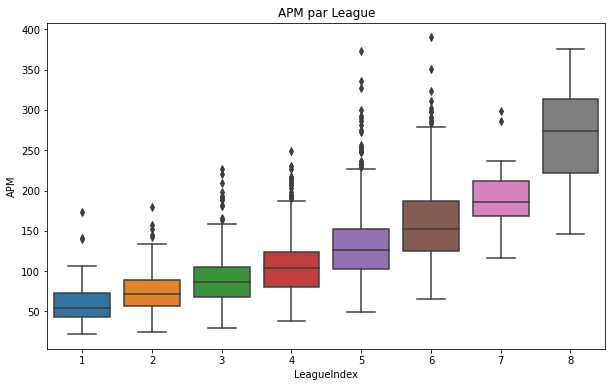

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "APM", data = dataf).set_title("APM par League")

On peut voir que plus grand sont les apm ( action par minute ) plus haute est la league

Text(0.5, 1.0, 'SelectByHotkeys par League')

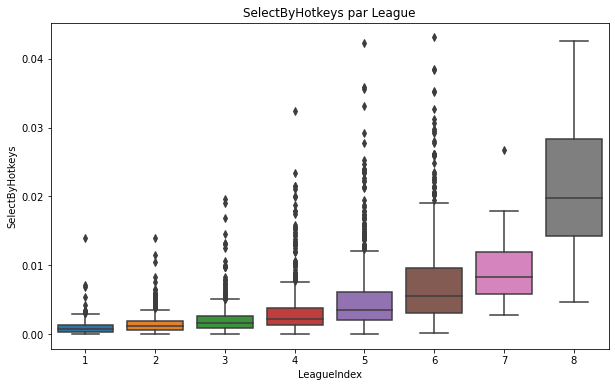

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "SelectByHotkeys", data = dataf).set_title("SelectByHotkeys par League")

plus un joueur selectionne de chose avec des raccourci meilleur il est car il effectue un gain de temps

Text(0.5, 1.0, 'AssignToHotkeys par League')

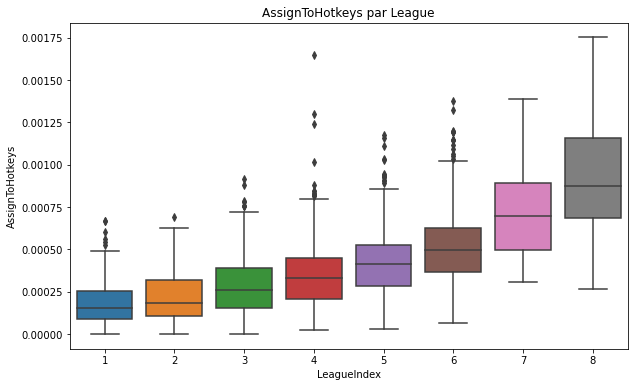

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "AssignToHotkeys", data = dataf).set_title("AssignToHotkeys par League")

Comme au dessus plus il y a de raccourci assigné, meilleur est la microgestion de ses troupe ( plus d'explication dans le pdf ) et donc meilleur est le rang

[]

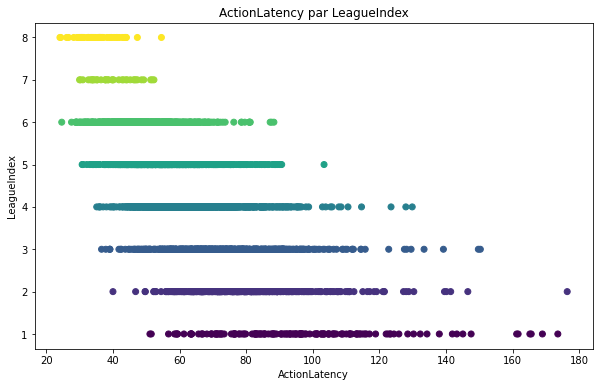

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(dataf['ActionLatency'],dataf['LeagueIndex'],c=dataf['LeagueIndex'])
plt.title('ActionLatency par LeagueIndex' )
plt.xlabel('ActionLatency')
plt.ylabel('LeagueIndex')
plt.plot()

Plus faible est l'actionLatency plus grande est la connaissance du jeu et donc des actions

[]

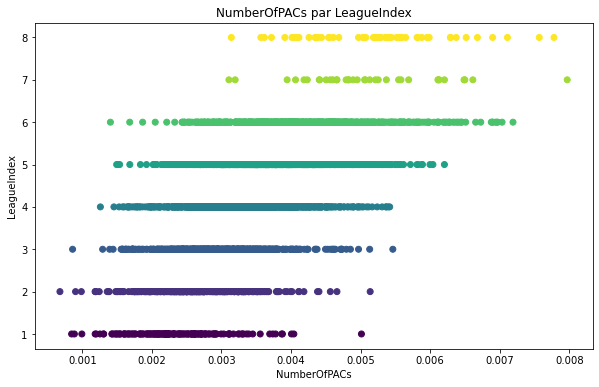

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(dataf['NumberOfPACs'],dataf['LeagueIndex'],c=dataf['LeagueIndex'])
plt.title('NumberOfPACs par LeagueIndex' )
plt.xlabel('NumberOfPACs')
plt.ylabel('LeagueIndex')
plt.plot()

Le PAC ou Perception Action Cycle signifie le fait de savoir ce qu'il faut faire selon certaine circonstance ( par exemple le fait de bouger sa caméra a un endroit et agir en conséquence ) et donc on peut voir que le nombre de pac est plus important a haut niveau

Text(0.5, 1.0, 'UniqueHotkeys par League')

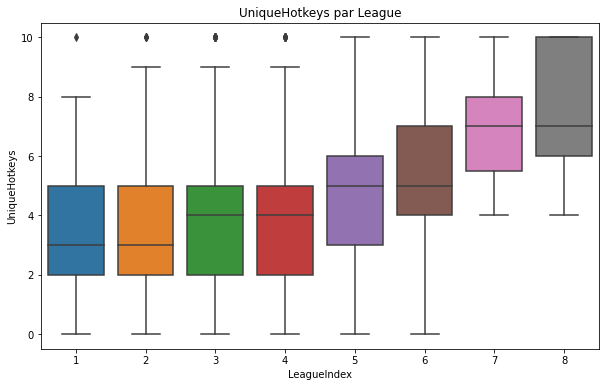

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "UniqueHotkeys", data = dataf).set_title("UniqueHotkeys par League")

On peut voir que plus le niveau est haut plus on a de raccourci même si ça reste assez faible comme différence

Text(0.5, 1.0, 'MinimapAttacks par League')

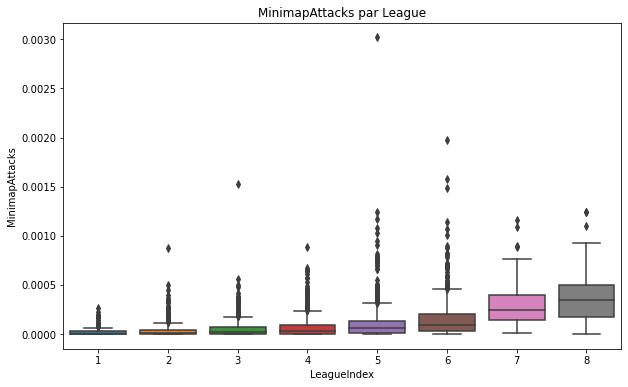

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "MinimapAttacks", data = dataf).set_title("MinimapAttacks par League")

C'est le fait d'attaquer via la minimap et non l'écran de base, ça permet de faire d'autre chose en même temps et donc d'être plus efficace. On constate que plus le niveau est élevé plus c'est utilisé

Text(0.5, 1.0, 'MinimapRightClicks par League')

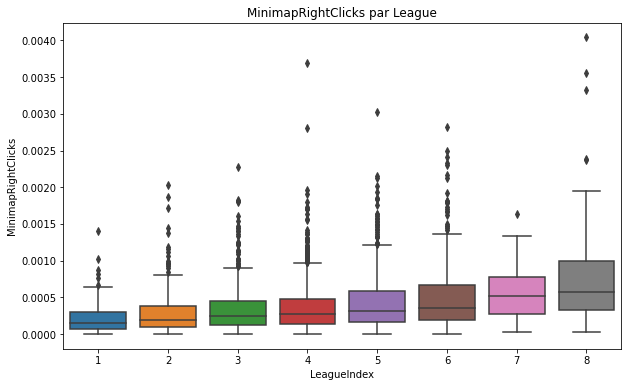

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "MinimapRightClicks", data = dataf).set_title("MinimapRightClicks par League")

Comme au dessus, le fait d'utiliser la minimap est un gain de temps et est plus utilisé a haut niveau

Text(0.5, 1.0, 'GapBetweenPACs par League')

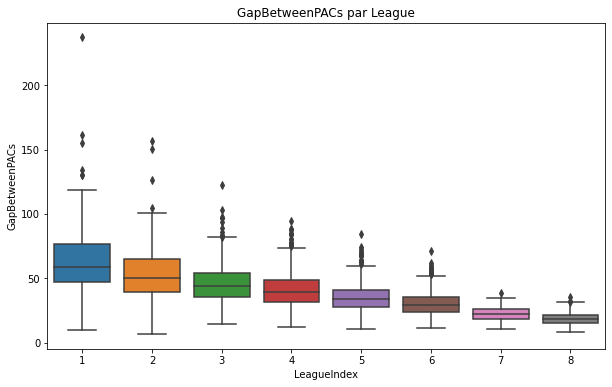

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "GapBetweenPACs", data = dataf).set_title("GapBetweenPACs par League")

Plus le niveau est élevé, plus l'écart entre les PAC est petit

Text(0.5, 1.0, 'ActionsInPAC par League')

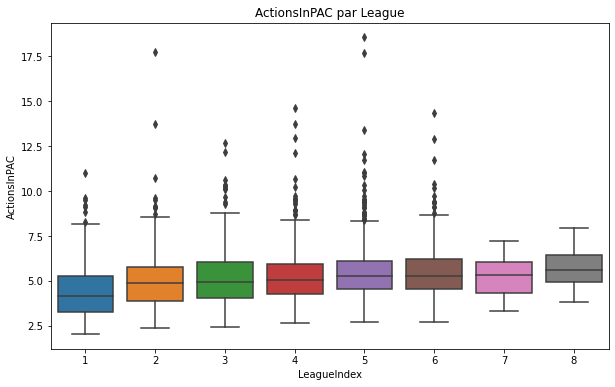

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "ActionsInPAC", data = dataf).set_title("ActionsInPAC par League")

Pas de grande corrélation

Text(0.5, 1.0, 'TotalMapExplored par League')

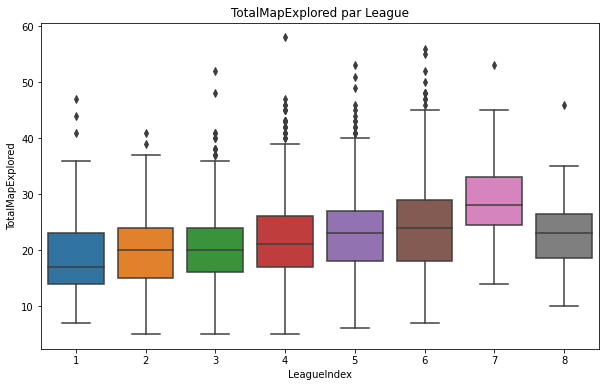

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "TotalMapExplored", data = dataf).set_title("TotalMapExplored par League")

Il n'y a pas une si grande différence entre les league pour l'exploration de la carte

Text(0.5, 1.0, 'WorkersMade par League')

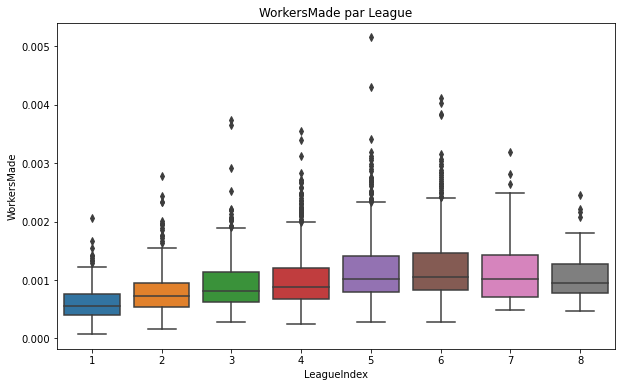

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "WorkersMade", data = dataf).set_title("WorkersMade par League")

Pas de corrélation importante

Text(0.5, 1.0, 'UniqueUnitsMade par League')

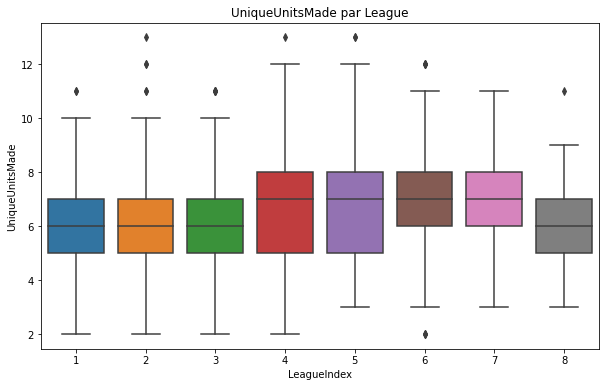

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "LeagueIndex", y = "UniqueUnitsMade", data = dataf).set_title("UniqueUnitsMade par League")

Pas de corrélation

### On supprime les colonnes sans grande corrélation 
on enleve aussi les 3 colonnes avec des valeurs nulles, on aurait pu garder HoursPerWeek mais n'ayant aucune valeur dans la ligue 8 pour cette données, on aurait du utiliser la mediane de la ligue 7 pour remplacer les données et donc ça n'aurait pas été véridicte.

In [34]:
dataf.drop(["GameID", "Age", "TotalHours","HoursPerWeek", "UniqueUnitsMade", "ComplexUnitsMade", "ComplexAbilitiesUsed"], axis = 1, inplace = True)
dataf

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade
0,5,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397
1,5,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194
2,4,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745
3,3,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426
4,3,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,8,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877
3391,8,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788
3392,8,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260
3393,8,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613


### On split le dataset en train et test
et on teste différent modèle

In [35]:
# on divise en train et test
y = dataf.LeagueIndex
X_train, X_test, y_train, y_test = train_test_split(dataf, y, test_size = 0.3)

# on supprime la cible de l'ensemble de train
X_train.drop("LeagueIndex", axis = 1, inplace = True)
X_test.drop("LeagueIndex", axis = 1, inplace = True)

print("X_train: ", X_train.shape) 
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape) 
print("y_test: ", y_test.shape)

X_train:  (2376, 12)
y_train:  (2376,)
X_test:  (1019, 12)
y_test:  (1019,)


c:\users\thoma\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)



### Logistic regression

In [37]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train1, y_train)

LogisticRegression(max_iter=1000)

In [38]:
print("Précision de regression logistique sur l'ensemble train : ", round(logreg.score(X_train1, y_train),2))
print("Précision de regression logistique sur l'ensemble test : ", round(logreg.score(X_test1, y_test),2))

Précision de regression logistique sur l'ensemble train :  0.4
Précision de regression logistique sur l'ensemble test :  0.39


### Multinomial Naive-Bayes

In [39]:
naib = MultinomialNB()
model_1 = naib.fit(X_train1, y_train)
predictions_1 = naib.predict(X_test1)

print(predictions_1[:10])
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_1), 2))

[4 4 5 4 4 5 4 4 4 4]
Classification Accuracy:  0.3


### Random forest

In [40]:
rf = RandomForestClassifier(n_estimators = 64, random_state = 123)
model_2 = rf.fit(X_train1, y_train)
predictions_2 = rf.predict(X_test1)

print(predictions_2[:10])
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_2), 2))

[4 3 6 4 4 5 4 4 4 4]
Classification Accuracy:  0.37


### Support Vector Machine

In [41]:
supvm = svm.SVC(gamma = 0.00001, decision_function_shape = "ovr")
model_3 = supvm.fit(X_train1, y_train)
predictions_3 = supvm.predict(X_test1)

print(predictions_3[:10])
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_3), 2))

[4 4 4 4 4 4 4 4 4 4]
Classification Accuracy:  0.22


### Decision Tree

In [42]:
Detc = DecisionTreeClassifier().fit(X_train1, y_train)

print("Précision de Decision tree sur l'ensemble train : ", round(Detc.score(X_train1, y_train),2))
print("Précision de Decision tree sur l'ensemble test : ", round(Detc.score(X_test1, y_test),2))

Précision de Decision tree sur l'ensemble train :  1.0
Précision de Decision tree sur l'ensemble test :  0.3


### K-NN

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train)
print("Précision de K-NN sur l'ensemble train : ", round(knn.score(X_train1, y_train),2))
print("Précision de K-NN sur l'ensemble test : ",round(knn.score(X_test1, y_test),2))

Précision de K-NN sur l'ensemble train :  0.54
Précision de K-NN sur l'ensemble test :  0.32


### Linear discriminant analysis

In [44]:
lda = LinearDiscriminantAnalysis().fit(X_train1, y_train)
print("Précision de LDA sur l'ensemble train : ", round(lda.score(X_train1, y_train),2))
print("Précision de LDA sur l'ensemble test : " ,round(lda.score(X_test1, y_test),2))

Précision de LDA sur l'ensemble train :  0.4
Précision de LDA sur l'ensemble test :  0.39


### Gaussian Naive Bayes

In [45]:
gnb = GaussianNB()
gnb.fit(X_train1, y_train)
print("Précision de GNB sur l'ensemble train: ",round(gnb.score(X_train1, y_train),2))
print("Précision de GNB sur l'ensemble test: ", round(gnb.score(X_test1, y_test),2))

Précision de GNB sur l'ensemble train:  0.37
Précision de GNB sur l'ensemble test:  0.38


### On cherche le meilleur model

In [46]:
pred = logreg.predict(X_test1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  7  18  24  14   2   0   0   0]
 [  2  16  47  51   1   0   0   0]
 [  3  12  42  88  16   5   0   0]
 [  0  10  26 127  54  11   0   0]
 [  0   0   9  64 116  44   0   1]
 [  0   0   0  27  67  89   0   0]
 [  0   0   0   0   0  13   0   0]
 [  0   0   0   0   0   9   0   4]]
              precision    recall  f1-score   support

           1       0.58      0.11      0.18        65
           2       0.29      0.14      0.18       117
           3       0.28      0.25      0.27       166
           4       0.34      0.56      0.42       228
           5       0.45      0.50      0.47       234
           6       0.52      0.49      0.50       183
           7       0.00      0.00      0.00        13
           8       0.80      0.31      0.44        13

    accuracy                           0.39      1019
   macro avg       0.41      0.29      0.31      1019
weighted avg       0.40      0.39      0.38      1019



c:\users\thoma\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
pred = lda.predict(X_test1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 23  11  16  13   1   1   0   0]
 [ 19  15  41  39   3   0   0   0]
 [ 16  13  32  82  17   6   0   0]
 [  3  14  24 125  51  11   0   0]
 [  0   3  10  64 109  42   3   3]
 [  0   0   0  29  59  80   7   8]
 [  0   0   0   0   1   7   4   1]
 [  0   0   0   0   0   2   1  10]]
              precision    recall  f1-score   support

           1       0.38      0.35      0.37        65
           2       0.27      0.13      0.17       117
           3       0.26      0.19      0.22       166
           4       0.36      0.55      0.43       228
           5       0.45      0.47      0.46       234
           6       0.54      0.44      0.48       183
           7       0.27      0.31      0.29        13
           8       0.45      0.77      0.57        13

    accuracy                           0.39      1019
   macro avg       0.37      0.40      0.37      1019
weighted avg       0.39      0.39      0.38      1019



In [48]:
pred = rf.predict(X_test1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[14 26 17  6  2  0  0  0]
 [ 9 30 37 36  5  0  0  0]
 [ 4 26 48 66 18  4  0  0]
 [ 5 11 40 96 59 17  0  0]
 [ 0  2 16 66 92 57  0  1]
 [ 0  0  4 23 60 90  0  6]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  3  0 10]]
              precision    recall  f1-score   support

           1       0.44      0.22      0.29        65
           2       0.32      0.26      0.28       117
           3       0.30      0.29      0.29       166
           4       0.33      0.42      0.37       228
           5       0.39      0.39      0.39       234
           6       0.49      0.49      0.49       183
           7       0.00      0.00      0.00        13
           8       0.59      0.77      0.67        13

    accuracy                           0.37      1019
   macro avg       0.36      0.35      0.35      1019
weighted avg       0.37      0.37      0.37      1019



c:\users\thoma\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On exporte le modèle pour l'utiliser dans l'api

In [49]:
pickle.dump( rf, open( "randomF.p", "wb" ) )